## Exploratory Data Analysis (EDA)

Now that our dataset is cleaned and merged, this notebook explores the distributions, relationships, and overall quality of our main features and target variable. The aim is to catch any remaining data issues and build intuition for which features will be useful in downstream models.


## 1. Load the Cleaned Dataset

We use the output of our data cleaning notebook so everyone’s working from the same starting point.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ohlcv_master_clean.csv', parse_dates=['date'])
print(df.head())
print(df.info())


        date final_ticker     open     high      low    close  px_volume
0 2005-04-15           AA  66.1789  67.4331  65.2831  65.6190  3797001.0
1 2005-04-18           AA  65.6414  67.0747  65.3951  66.2685  2941698.0
2 2005-04-19           AA  66.1341  67.0747  65.0815  65.8206  3017338.0
3 2005-04-20           AA  65.6638  65.7758  64.3313  64.7232  2400296.0
4 2005-04-21           AA  65.1263  66.2909  64.3201  66.1789  2780416.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719630 entries, 0 to 719629
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          719630 non-null  datetime64[ns]
 1   final_ticker  719630 non-null  object        
 2   open          719630 non-null  float64       
 3   high          719630 non-null  float64       
 4   low           719630 non-null  float64       
 5   close         719630 non-null  float64       
 6   px_volume     719630 non-null  float64 

## 2. Basic Overview

Let’s look at overall size, number of unique tickers, date coverage, and check for any lingering nulls.


In [2]:
print(f"Data shape: {df.shape}")
print(f"Unique tickers: {df['final_ticker'].nunique()}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print("Missing values by column:\n", df.isnull().sum())


Data shape: (719630, 7)
Unique tickers: 163
Date range: 2005-04-15 00:00:00 to 2025-04-15 00:00:00
Missing values by column:
 date            0
final_ticker    0
open            0
high            0
low             0
close           0
px_volume       0
dtype: int64


## 3. Summary Statistics

We look at the main stats for price and volume, which helps spot any issues with outliers or scale.


In [3]:
print(df[['open','high','low','close','px_volume']].describe())


                open           high            low          close  \
count  719630.000000  719630.000000  719630.000000  719630.000000   
mean       90.920345      91.894222      89.924952      90.926203   
std       171.515052     173.395753     169.632168     171.539604   
min         0.020000       0.021600       0.005500       0.018000   
25%        29.920000      30.280000      29.520000      29.910000   
50%        51.770000      52.320000      51.200000      51.780000   
75%        91.798750      92.697325      90.854000      91.800000   
max      5300.000000    5337.240000    5260.000000    5300.340000   

          px_volume  
count  7.196300e+05  
mean   1.315352e+07  
std    2.886414e+07  
min    4.195070e+05  
25%    2.716904e+06  
50%    5.347392e+06  
75%    1.115147e+07  
max    2.591265e+08  


## 4. Distribution Plots

We plot some price and volume histograms to spot outliers, scale issues, or anything funky that stands out.


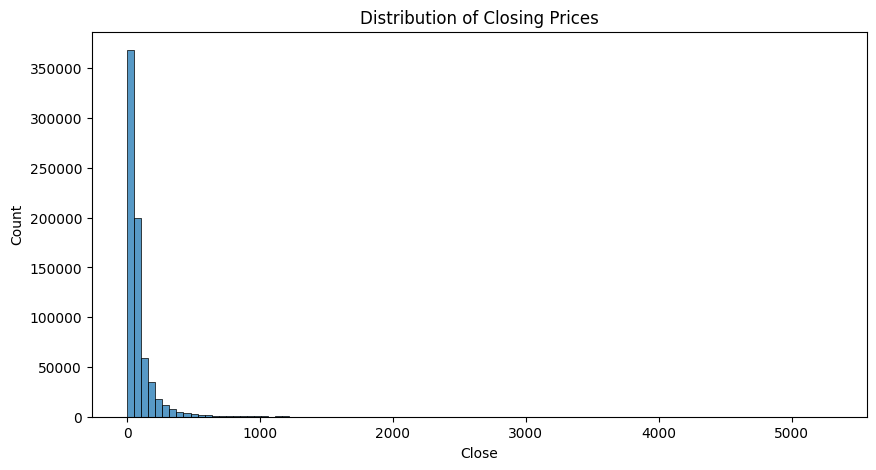

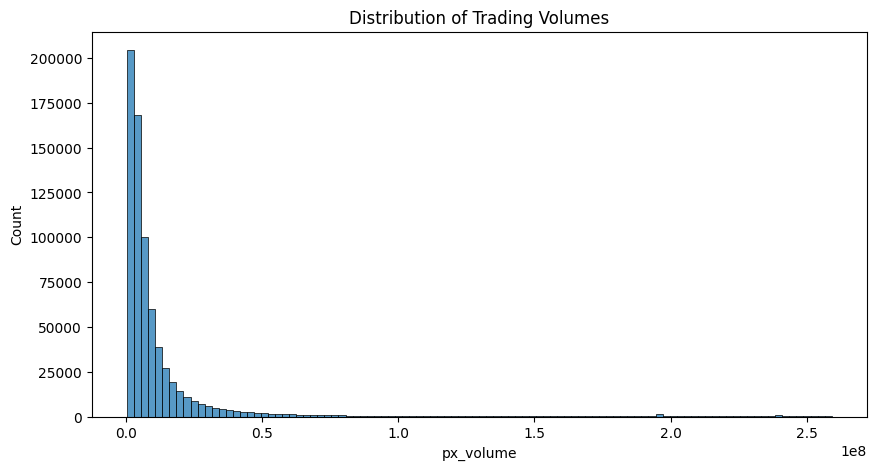

In [4]:
plt.figure(figsize=(10, 5))
sns.histplot(df['close'], bins=100, kde=False)
plt.title('Distribution of Closing Prices')
plt.xlabel('Close')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['px_volume'], bins=100, kde=False)
plt.title('Distribution of Trading Volumes')
plt.xlabel('px_volume')
plt.show()


## 5. Ticker Activity Over Time

Let’s see how many tickers are active on each date and make sure there are no big dropouts or weird gaps in coverage.


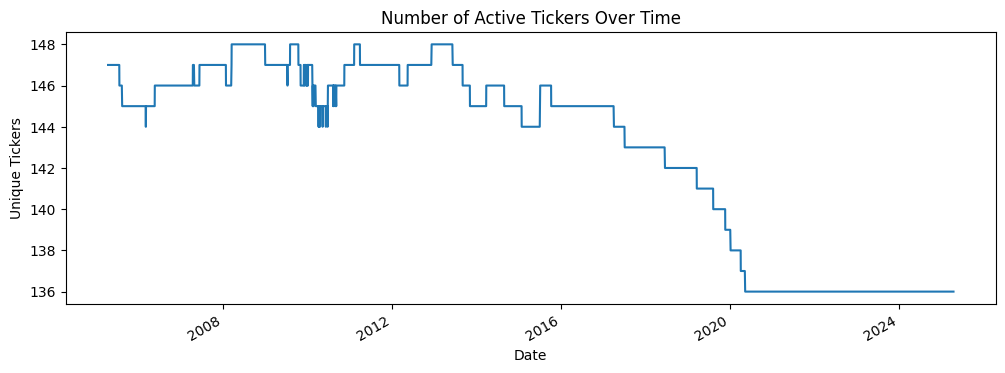

In [5]:
ticker_counts = df.groupby('date')['final_ticker'].nunique()
plt.figure(figsize=(12, 4))
ticker_counts.plot()
plt.title('Number of Active Tickers Over Time')
plt.xlabel('Date')
plt.ylabel('Unique Tickers')
plt.show()


## 6. Price Trends for a Few Example Tickers

Sometimes it’s useful to eyeball a couple of names over time to check for weirdness or look at long-term trends.


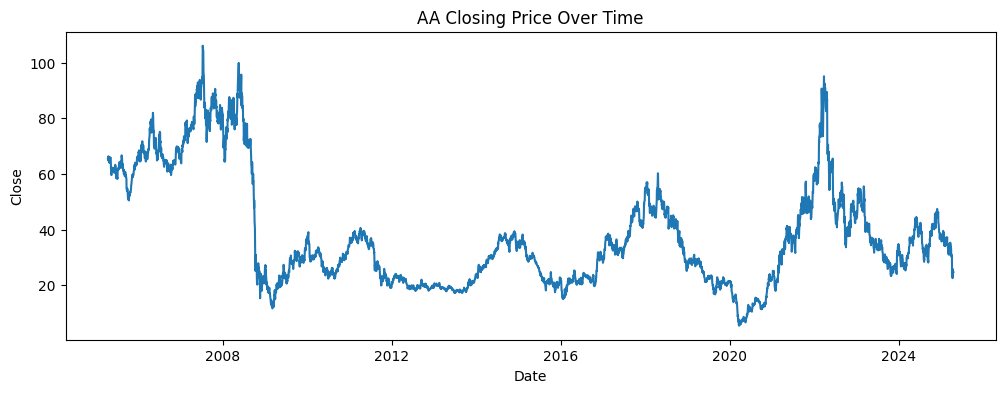

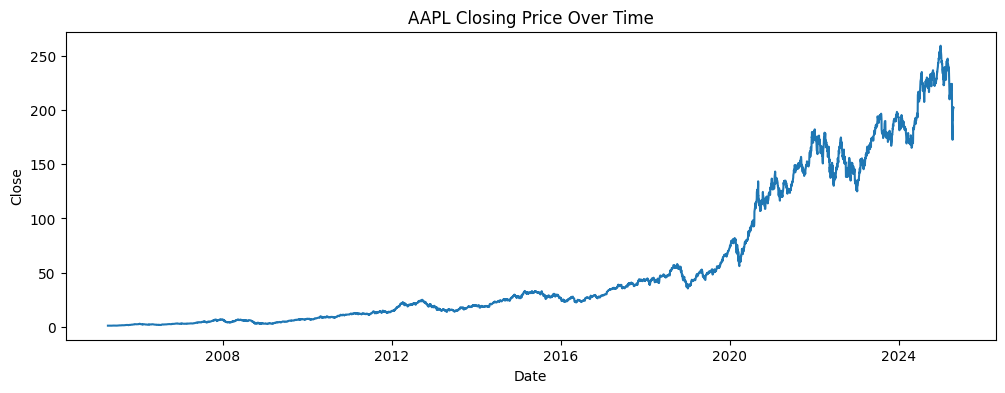

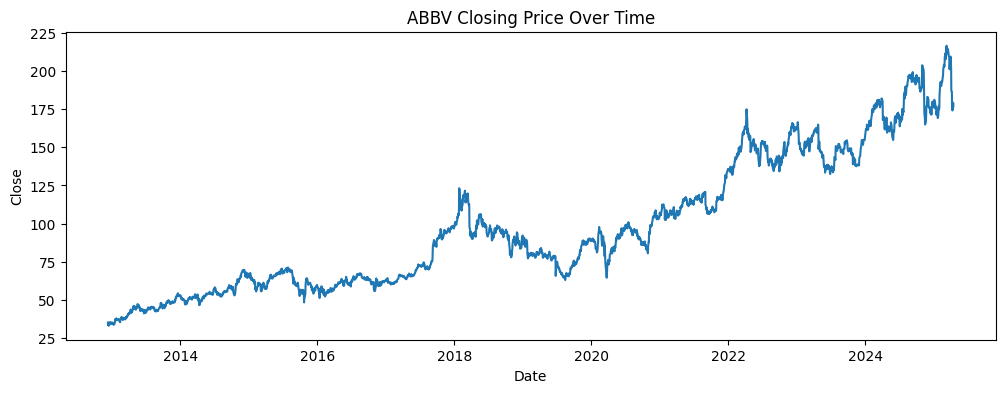

In [6]:
sample_tickers = df['final_ticker'].unique()[:3]
for ticker in sample_tickers:
    plt.figure(figsize=(12,4))
    temp = df[df['final_ticker'] == ticker]
    plt.plot(temp['date'], temp['close'])
    plt.title(f'{ticker} Closing Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close')
    plt.show()


## 7. Correlation Heatmap

Let’s check for relationships or redundancy between the main raw numeric columns before building any new features.


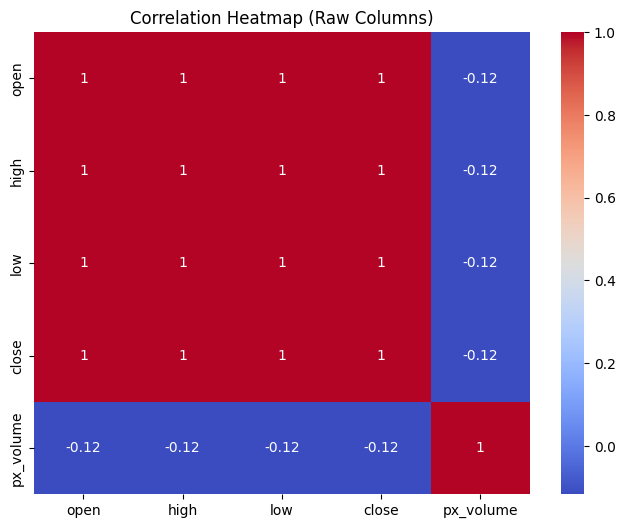

In [7]:
numeric_cols = ['open', 'high', 'low', 'close', 'px_volume']
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Raw Columns)')
plt.show()


## 8. EDA Notes

Anything strange that shows up here like big outliers, missing data, or sudden drops in ticker coverage, should get flagged for follow-up before moving on to feature engineering.


* Price and volume distributions are right-skewed with a handful of high outliers, which is typical for a broad equity universe.

* No missing values or data gaps detected after cleaning.

* Ticker count stays stable until about 2018, then declines as companies leave the index, which matches real index turnover.

* Open, high, low, and close columns are highly correlated; volume is only weakly correlated to price, as expected.

* No structural issues found—data looks clean and ready for feature engineering.